1. RFE(Recursive Feature Elimination)
    우선 모든 변수를 사용하여 모델을 훈련, 가장 중요하지 않은 변수를 제거
    
    원하는 변수의 수에 도달할 때까지 과정을 반복
    
    변수의 중요성은 의사 결정 나무의 변수 중요도 또는 선형 모델의 계수값, 신경망의 가중치의 계수 크기로 어떤 변수를 삭제해야할지 결정

2. RFE-CV (Cross Validation 교차 검증을 도입)

3. UFS (특정 검전 통계(F-Value), 또는 카이-제곱 값)을 계산하여 각 변수를 평가하고, 가장 높은 점수를 가진 변수 선택

데이터 전처리 및 어떤 변수를 제거해야할지 파악해보자..

# 전처리에 필요한 라이브러리 및 함수 가져오기와 머신 러닝 함수 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

# 데이터 가져오기

In [2]:
df=pd.read_csv(r'C:\Users\hyssk\AICE_\Dacon_DataAnlysis\train.csv')
df.drop('user_id',axis=1,inplace=True) # 과대적합을 야기할 user_id 삭제
df

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


# df에 결측치가 존재하는지 파악

In [3]:
df.isnull().sum()

subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

결측치가 존재하지 않는다.

# 범주형 데이터 정제하기

레이블
- Pandas (Factorize)
- sklearn (LabelEncoder)

원핫 인코딩
- pd.get_dummies(하고자하는 칼럼명)
- from sklearn.preprocessing import OneHotEncoder

In [4]:
# 범주형 데이터 전처리 (preferred_difficulty_level) factorize 코딩
labeled_preferred_difficulty_level=pd.factorize(df['preferred_difficulty_level'])[0].reshape(-1,1)
df.insert(9,'labeled_preferred_difficulty_level',labeled_preferred_difficulty_level)

In [5]:
df.drop('preferred_difficulty_level',axis=1,inplace=True)
df

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,Basic,2,0,1


In [6]:
cate=pd.Categorical(df['subscription_type'],['Basic','Premium'],ordered=True)
labels,unique=pd.factorize(cate,sort=True)
df['subscription_type']=labels
df

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1


In [7]:
ohe=OneHotEncoder()
a=ohe.fit_transform(df[['payment_pattern']]).toarray()

col=['3개월 모두 결제함','첫 2개월은 결제했으나 마지막 달에는 결제하지 않음','첫 달과 마지막 달에 결제함',
'첫 달에만 결제함','마지막 2개월에 결제함','가운데 달에만 결제함','마지막 달에만 결제함','3개월 동안 결제하지 않음']
col.reverse()
onehotencoded=pd.DataFrame(a,columns=[i for i in col])
df.drop(['payment_pattern'],axis=1,inplace=True)


In [8]:
df=pd.concat([df,onehotencoded],axis=1)
df

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,...,customer_inquiry_history,target,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,...,4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,...,3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,...,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,...,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# feature와 target 나누기


In [9]:
# X(Features)와 y(target) 나누기
X=df.drop(['target'],axis=1)
y=df['target']

In [10]:
# train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [11]:
# X_train 칼럼 갯수
len(X_train.keys())
X_train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
9254,11,3,15.298435,35.587179,9,15,61.325364,4,5,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1561,14,19,17.193117,185.901568,12,14,86.587523,1,5,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1670,13,27,13.399272,1.903421,14,15,64.560131,3,4,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6087,19,6,12.814237,89.294899,7,10,76.285842,1,4,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,20,3,18.232309,76.949024,14,9,82.132995,4,4,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5,15,16.348315,48.808410,23,14,71.599465,3,3,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,10,24,20.926596,41.718489,17,11,78.684889,6,3,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,15,12,16.692484,100.130452,22,21,107.135153,5,5,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,16,27,14.095176,16.192716,9,13,55.206152,2,4,1,1,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# X_train의 형태
type(X_train)

pandas.core.frame.DataFrame

# Scaler (Normalization | Standarzation)

칼럼마다 값의 scale이 다르다.

각 칼럼의 상대적인 크기에 따라 모델 성능에 크게 영향을 끼칠 가능성이 있기 때문에, 

Scaler를 적용할 필요성이 있다.

수치형 데이터만 scaler 시키기

In [13]:
# 수치형 데이터만 scaler 적용
#scaled_column=['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement'] # 스케일될 수치 칼럼들 experiment 1

#minmaxscaler=MinMaxScaler()
#for column in scaled_column:
#    X_train[column]=minmaxscaler.fit_transform(X_train[[column]])
#    X_test[column]=minmaxscaler.transform(X_test[[column]])

#X_train # scale 되었는지 확인하기

In [14]:
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# 머신러닝 모델 생성 및 학습하기

In [15]:
# Decision tree
dt=DecisionTreeClassifier(random_state=1001,
                          max_depth=2
                          )

# 의사결정나무 학습하기
dt_model=dt.fit(X_train,y_train)

# 학습데이터 정확도확인
print("학습 정확도: ",dt_model.score(X_train,y_train))

# 검증데이터 정확도확인
print("검증 정확도: ",dt_model.score(X_test,y_test))

dt_model.feature_importances_

for i in range(len(dt_model.feature_importances_)):
  print(f"{X_train.columns[i]} = {dt_model.feature_importances_[i]}")
  

학습 정확도:  0.619625
검증 정확도:  0.621
subscription_duration = 0.0
recent_login_time = 0.0
average_login_time = 0.0
average_time_per_learning_session = 0.9664107311554104
monthly_active_learning_days = 0.0
total_completed_courses = 0.0
recent_learning_achievement = 0.0
abandoned_learning_sessions = 0.0
community_engagement_level = 0.0
labeled_preferred_difficulty_level = 0.0335892688445895
subscription_type = 0.0
customer_inquiry_history = 0.0
3개월 동안 결제하지 않음 = 0.0
마지막 달에만 결제함 = 0.0
가운데 달에만 결제함 = 0.0
마지막 2개월에 결제함 = 0.0
첫 달에만 결제함 = 0.0
첫 달과 마지막 달에 결제함 = 0.0
첫 2개월은 결제했으나 마지막 달에는 결제하지 않음 = 0.0
3개월 모두 결제함 = 0.0


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import random
import numpy as np


In [17]:
# 모델 시드 고정하기
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(len(X_train.keys()),)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [18]:
es=EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=1,validation_data=(X_test,y_test),callbacks=[es])


Epoch 1/100
63/63 [==============================] - 2s 9ms/step - loss: 0.7817 - accuracy: 0.5605 - val_loss: 0.6481 - val_accuracy: 0.6210
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5964 - val_loss: 0.6466 - val_accuracy: 0.6210
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6014 - val_loss: 0.6487 - val_accuracy: 0.6210
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.6105 - val_loss: 0.6488 - val_accuracy: 0.6210
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6133 - val_loss: 0.6498 - val_accuracy: 0.6210
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6140 - val_loss: 0.6538 - val_accuracy: 0.6210
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6160 - val_loss: 0.6478 - val_accuracy: 0.6210
Epoch 8/100
6

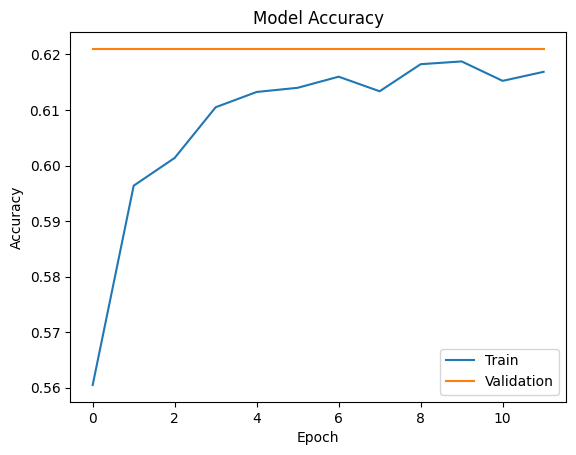

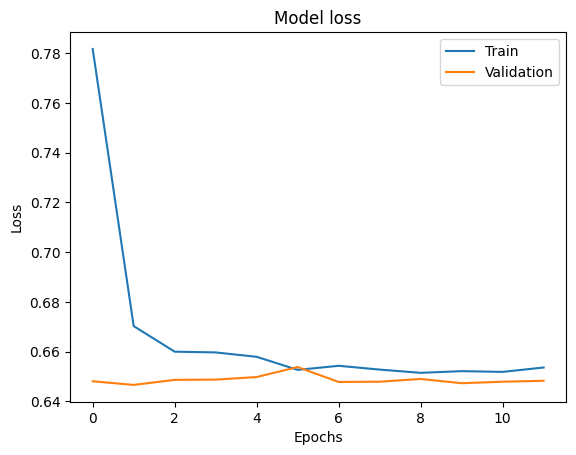

In [19]:
import matplotlib.pyplot as plt

# 훈련 과정 정확도 시각화하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train',"Validation"],loc='lower right')
plt.show()

# 훈련 과정 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'],loc='upper right')
plt.show()

In [20]:
X_validation=pd.read_csv(r'C:\Users\hyssk\AICE_\Dacon_DataAnlysis\test.csv')
X_validation_user_id=X_validation['user_id']
labeled_preferred_difficulty_level_validation=pd.factorize(X_validation['preferred_difficulty_level'])[0].reshape(-1,1)
X_validation.insert(10,'labeled_preferred_difficulty_level',labeled_preferred_difficulty_level_validation)


In [21]:
X_validation.drop(['preferred_difficulty_level','user_id'],axis=1,inplace=True)
X_validation

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,9,15,11.173051,7.047243,19,15,82.074557,3,5,0,Premium,2,7
1,11,8,13.448592,24.583327,10,16,80.546040,4,2,0,Basic,4,4
2,11,28,18.548201,1.707616,9,19,73.676957,5,5,0,Premium,1,3
3,14,17,13.383311,21.391389,12,6,63.314635,0,4,1,Premium,1,5
4,19,6,11.919663,18.126987,8,15,55.899647,1,4,2,Basic,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,24,11.924481,90.251023,20,21,70.552157,4,5,2,Premium,1,6
9996,15,26,12.395364,10.205804,18,7,67.558845,2,2,2,Basic,3,5
9997,6,13,17.036811,20.346781,22,9,89.294007,5,2,2,Basic,1,0
9998,18,9,15.758179,156.521711,13,10,82.218390,2,5,0,Premium,2,5


In [22]:
cate_validation=pd.Categorical(X_validation['subscription_type'],['Basic','Premium'],ordered=True)
labels_val,unique=pd.factorize(cate_validation,sort=True)
X_validation['subscription_type']=labels_val
X_validation

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,9,15,11.173051,7.047243,19,15,82.074557,3,5,0,1,2,7
1,11,8,13.448592,24.583327,10,16,80.546040,4,2,0,0,4,4
2,11,28,18.548201,1.707616,9,19,73.676957,5,5,0,1,1,3
3,14,17,13.383311,21.391389,12,6,63.314635,0,4,1,1,1,5
4,19,6,11.919663,18.126987,8,15,55.899647,1,4,2,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,24,11.924481,90.251023,20,21,70.552157,4,5,2,1,1,6
9996,15,26,12.395364,10.205804,18,7,67.558845,2,2,2,0,3,5
9997,6,13,17.036811,20.346781,22,9,89.294007,5,2,2,0,1,0
9998,18,9,15.758179,156.521711,13,10,82.218390,2,5,0,1,2,5


In [23]:
ohe=OneHotEncoder()
validation=ohe.fit_transform(X_validation[['payment_pattern']]).toarray()

col=['3개월 모두 결제함','첫 2개월은 결제했으나 마지막 달에는 결제하지 않음','첫 달과 마지막 달에 결제함',
'첫 달에만 결제함','마지막 2개월에 결제함','가운데 달에만 결제함','마지막 달에만 결제함','3개월 동안 결제하지 않음']
col.reverse()
onehotencoded_val=pd.DataFrame(validation,columns=[i for i in col])
X_validation.drop(['payment_pattern'],axis=1,inplace=True)

X_validation=pd.concat([X_validation,onehotencoded_val],axis=1)
X_validation

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
0,9,15,11.173051,7.047243,19,15,82.074557,3,5,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,8,13.448592,24.583327,10,16,80.546040,4,2,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11,28,18.548201,1.707616,9,19,73.676957,5,5,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14,17,13.383311,21.391389,12,6,63.314635,0,4,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19,6,11.919663,18.126987,8,15,55.899647,1,4,2,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,24,11.924481,90.251023,20,21,70.552157,4,5,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,15,26,12.395364,10.205804,18,7,67.558845,2,2,2,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,6,13,17.036811,20.346781,22,9,89.294007,5,2,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,18,9,15.758179,156.521711,13,10,82.218390,2,5,0,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
X_train_X_test=pd.concat([X_train,X_test],axis=0)
X_train_X_test

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
9254,11,3,15.298435,35.587179,9,15,61.325364,4,5,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1561,14,19,17.193117,185.901568,12,14,86.587523,1,5,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1670,13,27,13.399272,1.903421,14,15,64.560131,3,4,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6087,19,6,12.814237,89.294899,7,10,76.285842,1,4,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,20,3,18.232309,76.949024,14,9,82.132995,4,4,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,8,15,16.641179,9.960804,5,7,58.329160,7,5,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8285,3,28,14.658474,10.809871,23,19,64.952522,1,2,0,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7853,2,24,13.294821,10.630449,21,18,71.816949,2,5,1,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,4,10,21.105407,28.294966,3,17,74.612746,3,1,1,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
scaled_column=['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement'] # 스케일될 수치 칼럼들 experiment 1

minmaxscaler=MinMaxScaler()
X_train_X_test=pd.concat([X_train,X_test],axis=0)
for column in scaled_column:
    X_train_X_test[column]=minmaxscaler.fit_transform(X_train_X_test[[column]])
    X_validation[column]=minmaxscaler.transform(X_validation[[column]])

X_validation

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
0,0.363636,0.500000,0.357533,0.013977,0.782609,0.538462,0.601454,3,5,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.454545,0.250000,0.449913,0.048815,0.391304,0.576923,0.581526,4,2,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.454545,0.964286,0.656943,0.003370,0.347826,0.692308,0.491971,5,5,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.590909,0.571429,0.447263,0.042474,0.478261,0.192308,0.356873,0,4,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.818182,0.178571,0.387843,0.035989,0.304348,0.538462,0.260200,1,4,2,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.409091,0.821429,0.388039,0.179274,0.826087,0.769231,0.451232,4,5,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.636364,0.892857,0.407155,0.020252,0.739130,0.230769,0.412206,2,2,2,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.227273,0.428571,0.595585,0.040399,0.913043,0.307692,0.695578,5,2,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.772727,0.285714,0.543676,0.310930,0.521739,0.346154,0.603330,2,5,0,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X_train
# 수치형 데이터만 scaler 적용
scaled_column=['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement'] # 스케일될 수치 칼럼들 experiment 1

minmaxscaler=MinMaxScaler()
for column in scaled_column:
    X_train[column]=minmaxscaler.fit_transform(X_train[[column]])
    X_test[column]=minmaxscaler.transform(X_test[[column]])

X_train_X_test=pd.concat([X_train,X_test],axis=0)
X_train_X_test

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,labeled_preferred_difficulty_level,subscription_type,customer_inquiry_history,3개월 동안 결제하지 않음,마지막 달에만 결제함,가운데 달에만 결제함,마지막 2개월에 결제함,첫 달에만 결제함,첫 달과 마지막 달에 결제함,첫 2개월은 결제했으나 마지막 달에는 결제하지 않음,3개월 모두 결제함
9254,0.454545,0.071429,0.525012,0.070676,0.347826,0.538462,0.330938,4,5,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1561,0.590909,0.642857,0.601930,0.369298,0.478261,0.500000,0.660292,1,5,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1670,0.545455,0.928571,0.447911,0.003759,0.565217,0.538462,0.373111,3,4,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6087,0.818182,0.178571,0.424160,0.177374,0.260870,0.346154,0.525984,1,4,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,0.863636,0.071429,0.644118,0.152848,0.565217,0.307692,0.602216,4,4,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.318182,0.500000,0.579523,0.019766,0.173913,0.230769,0.291875,7,5,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8285,0.090909,0.964286,0.499031,0.021453,0.956522,0.692308,0.378227,1,2,0,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7853,0.045455,0.821429,0.443671,0.021096,0.869565,0.653846,0.467721,2,5,1,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.136364,0.321429,0.760758,0.056189,0.086957,0.615385,0.504171,3,1,1,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
X_train.columns, X_validation.columns

(Index(['subscription_duration', 'recent_login_time', 'average_login_time',
        'average_time_per_learning_session', 'monthly_active_learning_days',
        'total_completed_courses', 'recent_learning_achievement',
        'abandoned_learning_sessions', 'community_engagement_level',
        'labeled_preferred_difficulty_level', 'subscription_type',
        'customer_inquiry_history', '3개월 동안 결제하지 않음', '마지막 달에만 결제함',
        '가운데 달에만 결제함', '마지막 2개월에 결제함', '첫 달에만 결제함', '첫 달과 마지막 달에 결제함',
        '첫 2개월은 결제했으나 마지막 달에는 결제하지 않음', '3개월 모두 결제함'],
       dtype='object'),
 Index(['subscription_duration', 'recent_login_time', 'average_login_time',
        'average_time_per_learning_session', 'monthly_active_learning_days',
        'total_completed_courses', 'recent_learning_achievement',
        'abandoned_learning_sessions', 'community_engagement_level',
        'labeled_preferred_difficulty_level', 'subscription_type',
        'customer_inquiry_history', '3개월 동안 결제하지 않음', '마지막 달에만 결제함',
  

In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.predict(X_validation)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)